# Practice

## Looping over list.

In [1]:
people = ['Tom', 'Dick','Harry']
for person in people:
    print('There \'s a person called ' + person)

There 's a person called Tom
There 's a person called Dick
There 's a person called Harry


## Element in List

In [2]:
print('The first person is ' + people[0])

The first person is Tom


## Dictionaries

In [3]:
# Considered one line of code, but broken up in different lines. It's easier to read.
stocks = {
    "CAKE":"Cheesecake Factor",
    "PZZA":"Papa John's Pizza",
    "FUN":"Cedar Fair",
    "CAR":"Avis Budget Group",
}

In [4]:
# Look up dictionary 'values'
print(stocks['PZZA'])

Papa John's Pizza


In [5]:
# Iterating over dictionaries; use 'format' to concatenate variables to string
for ticker, name in stocks.items():
    print("{} has ticker {}".format(name, ticker))

Cheesecake Factor has ticker CAKE
Papa John's Pizza has ticker PZZA
Cedar Fair has ticker FUN
Avis Budget Group has ticker CAR


## Conditional Logic

In [6]:
#if, elif, else

## Pandas
A library to handle structured data

## Calculating Moving Average

Date
2018-12-31    2508.75
2019-01-02    2490.00
2019-01-03    2451.75
2019-01-04    2529.50
2019-01-07    2553.75
Name: Last, dtype: float64


/home/hemzy/virtualenv/jupyter_env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


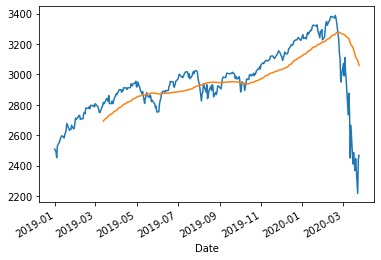

In [7]:
%matplotlib inline
import pandas as pd
# get data from quandl
import quandl as ql
ql.ApiConfig.api_key = "1n_RCUsoNABFGXdSYLmr"

# comma-delimited, [date],[sid]
data = ql.get("CHRIS/CME_ES1", start_date="2018-12-31", end_date="2020-3-25", returns="pandas")
print(data['Last'].head())

# Plotting prices
data_price = data
data_price['Last'].plot()

# Calculating and plotting SMA
data_sma = data.rolling(50).mean()
data_sma['Last'].plot()

## Python Simulation
Little demo on how to begin simulating trades.

/home/hemzy/virtualenv/jupyter_env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


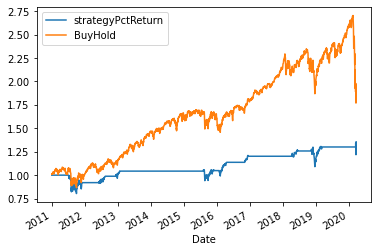

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
ql.ApiConfig.api_key = "1n_RCUsoNABFGXdSYLmr"

# pandas-data
data = ql.get("CHRIS/CME_ES1", start_date="2010-12-31", end_date="2020-3-25", returns="pandas")

# calculating two moving averages
data['sma50'] = data['Last'].rolling(50).mean() # 'sma50' creates another column, and its added to it
data['sma100'] = data['Last'].rolling(100).mean()

# set 1 if sma50 > sma100 at closing
data['position'] = np.where(data['sma50'] < data['sma100'], 1, 0) # create 'position' column, binary of if

# shift, or push indication for the next day, because we are calculating at CLOSING (cannot position at close)
data['position'] = data['position'].shift()

# calculate %/day strategy changes *daily returns*
# create new column, pct chance of index * position (1 to activate, 0 to stop counting)
# column calculates percent returns over the period where we long from start to next day
# stops counting when signal is at 0
data['strategyRet'] = data['Last'].pct_change(1) * data['position'] 

# Calculate PERCENT cumulative returns from strategy/from long hold (ADDING IT UP)
data['strategyPctReturn'] = (data['strategyRet'] + 1).cumprod() # add one to refer to starting portfolio percent
# Calculate PERCENT index cumulative returns (ADDING IT UP)
data['BuyHold'] = (data['Last'].pct_change(1) + 1).cumprod()

# Plot results
data[['strategyPctReturn', 'BuyHold']].plot();

## Making Correlation Graph

                     AMZN       SPY
2020-03-31 15:05:00   NaN  0.000841
2020-03-31 15:10:00   NaN  0.004768
2020-03-31 15:15:00   NaN  0.002604
2020-03-31 15:20:00   NaN  0.003823
2020-03-31 15:25:00   NaN       NaN


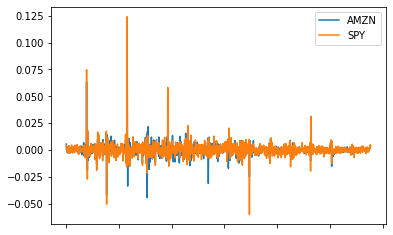

In [9]:
%matplotlib inline
import pandas as pd

#create automatic function to grab data and show returns (stock)
interval = '5min'
apikey = 'PKRZS8I6XWB7LBH4X1WW'
symbols = ['AMZN', 'SPY']

output = [] # temporary save
for elem in symbols:
    API_URL_CSV_DATA = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval={}&outputsize=full&apikey={}&datatype=csv'.format(elem, interval, apikey)
    data = pd.read_csv(API_URL_CSV_DATA, index_col=0, parse_dates=False).pct_change()
    output.append(data['close'])
    
output = pd.concat([output[0], output[1]], axis=1) # merge dataframe based on column index
output.columns = [symbols[0], symbols[1]] # rename first and second column
print(output.tail())
output.corr();

#Plotting returns
output.plot();

                     AMZN       SPY  AMZN_rolling: 10  SPY_rolling: 10  \
2020-03-31 15:05:00   NaN  0.000841               NaN        -0.000007   
2020-03-31 15:10:00   NaN  0.004768               NaN         0.000528   
2020-03-31 15:15:00   NaN  0.002604               NaN         0.000984   
2020-03-31 15:20:00   NaN  0.003823               NaN         0.001386   
2020-03-31 15:25:00   NaN       NaN               NaN              NaN   

                     rolling_correlation: 10  
2020-03-31 15:05:00                      NaN  
2020-03-31 15:10:00                      NaN  
2020-03-31 15:15:00                      NaN  
2020-03-31 15:20:00                      NaN  
2020-03-31 15:25:00                      NaN  


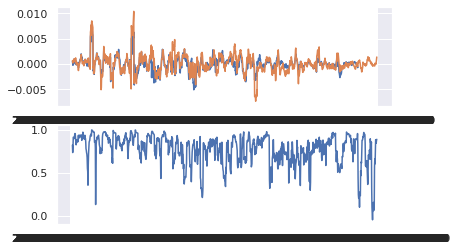

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

rollingNum = 10

# Calculate AMZN and SPY rolling mean, add to df
output[symbols[0] + '_rolling: {}'.format(str(rollingNum))] = output[symbols[0]].rolling(rollingNum).mean() 
output[symbols[1] + '_rolling: {}'.format(str(rollingNum))] = output[symbols[1]].rolling(rollingNum).mean()

#Calculate and plot rolling correlation
output['rolling_correlation: {}'.format(str(rollingNum))] = output['AMZN'].rolling(rollingNum).corr(output['SPY'])
print(output.tail())

# Plot rolling mean
fig, ax = plt.subplots(2)
ax[0].plot(output['AMZN_rolling: {}'.format(str(rollingNum))])
ax[0].plot(output['SPY_rolling: {}'.format(str(rollingNum))])
ax[1].plot(output['rolling_correlation: {}'.format(str(rollingNum))]);

# Save plot
plt.savefig("AMZN_SPY_correlation.png", dpi=500)

In [11]:
import datetime as time #To change unix epoch to date time format
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1544129220))

AttributeError: module 'datetime' has no attribute 'strftime'

# Creating a Testing Set up

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()

# Parameters for intra-day stocks
interval = '1min'
apikey = 'PKRZS8I6XWB7LBH4X1WW'
symbols = ['AAPL', 'SPY']
corr_window = 50
dfStocks = [] # temporary save

# fetch data function, percent change
for elem in symbols:
    API_URL_CSV_DATA = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval={}&outputsize=full&apikey={}&datatype=csv'.format(elem, interval, apikey)
    data = pd.read_csv(API_URL_CSV_DATA, index_col=0, parse_dates=False)
    dfStocks.append(data['close'])
dfStocks = pd.concat([dfStocks[0], dfStocks[1]], axis=1) # merge dataframe based on column index
dfStocks.columns = [symbols[0], symbols[1]] # rename first and second column

# Create Correlation Function
def calc_corr(window):
    a = dfStocks[symbols[0]].pct_change()
    b = dfStocks[symbols[1]].pct_change()
    corr = a.rolling(window).corr(b)
    return corr

# Rebase data (series start at initial value)
for ind in dfStocks:
    dfStocks[ind + '_rebased'] = (dfStocks[ind].pct_change() + 1).cumprod()


# gETTING everything
dfStocks['rel_str'] = dfStocks[symbols[0]]/dfStocks[symbols[1]]
dfStocks['corr'] = calc_corr(corr_window)


# testing dataframe
print(dfStocks.head(1))
# Figure (priming)
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(311) # Making 1st figure
ax.set_title('Stock Comparison')
ax.semilogy(dfStocks[symbols[0] + '_rebased'], linestyle='-', label='{}'.format(symbols[0]), linewidth=3.0)
ax.semilogy(dfStocks[symbols[1] + '_rebased'], linestyle='--', label='{}'.format(symbols[1]), linewidth=3.0)
ax.legend()
ax.grid(False)

ax = fig.add_subplot(312) # Making 2nd figure
ax.plot(dfStocks['rel_str'], label='Relative Strength, AAPL to S&P 500', linestyle=':', linewidth=3.0)
ax.legend()
ax.grid(True)

ax = fig.add_subplot(313) # Making 3rd figure
ax.plot(dfStocks['corr'], label='Correlation between Nasdaq and S&P 500', linestyle='-.', linewidth=3.0)
ax.legend()
ax.grid(True)

plt.show();